In [59]:
# Initialize Otter
# import otter
# grader = otter.Notebook("hwk3-task2-oil-spills.ipynb")

# Task 1: Visualizing oil spills in NY State

## Instructions

- First, update the following cell to have a link to *your* Homework 3 GitHub repository:

**UPDATE THIS LINK**
https://github.com/imsibaja/eds220-hwk3


- Review the [complete rubric for this task](https://docs.google.com/document/d/1Ce4EO3MEHW5uLks4x8BECWlkim2bcmxB4f8Qo4z26z8/edit?usp=sharing) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- Comment mindfully in a way that enriches your code. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.

- Delete all the comments initially included in this notebook (ex: `# Your code here`).


## About the data
In this task you will use two datsets:

### First dataset: oil spills data

The first dataset contains information about [spilling incidents in the state of New York](https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk). 
You can find extra information and metadata for this dataset in the `NYSDEC_SpillIncidents_Overview.pdf` and `NYSDEC_SpillIncidents_DataDictionary.pdf` documents available at the portal.

### Second dataset: TIGER shapefile

The second dataset is the [the 2023 Counties (and equivalent) TIGER shapefile](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2022.html#list-tab-790442341) from the Census Bureau. You can check the [metadata for all the TIGER shapefiles here](https://www.census.gov/programs-surveys/geography/technical-documentation/complete-technical-documentation/tiger-geo-line.html). 


## 1. File management
a. Create a `data/` directory inside your `eds220-hwk3` directory. If you download any data, it should be transferred into this folder. 

b. Add the `data/` directory to your `.gitignore` file and push your changes. This is IMPORTANT: the datasets we'll be working with are large and they will most likely jam your `git` workflow if you try to push them. Your `data/` directory should not be in your GitHub repository.

## 2. Datasets description
Read the metadata for both datsets and write a description about each one. Indicate the date sources and date of access.


The Oil Spills data set is about spilling incidents in New York State. The data has the location, types, quantity, and source of spills.
The TIGER shapefile is a Census dataset with geometries of the counties in the US. There is also info about hydrology, political boundaries and topography.

Oil spills data: 
Last Updated
November 4, 2024
Data Provided By
New York State Department of Environmental Conservation

TIGER Shapefile: 
Last Updated
November 22, 2023
Data Provided By
United States Census Bureau

## 3. Import libraries

In [60]:
import os

import pandas as pd
from pandas.api.types import is_string_dtype, is_numeric_dtype
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np


## 4. Import data 
In the next cell:

- Import the NY spills data as a variable named `spills`. 
- Import the US counties data as a variable named `counties`.

If you are using file paths to access the data, these should be constructed using the `os` package.

In [61]:
# Set data paths and read in spill tabular data
spills_path = os.path.join("data", "Spill_Incidents_20241104.csv")
spills = pd.read_csv(spills_path)

# Set data paths and read in counties shape data
counties_path = os.path.join('data','tl_2023_us_county','tl_2023_us_county.shp')
counties = gpd.read_file(counties_path)

## 5. Prepare spills data

This section refers to the `spills` dataframe. 
Check the outputs carefully, they will give you information you will need to use in the next exercises.

### 5.A. Exploration

In the next cells:

a. Check the dataframe's head.

b. Check the data types of the columns.

c. Check the unique values in the `material_family` column.

d. Check the unique values in the `county` column.

You can add other cells for preliminary data exploration.

In [62]:
# a. 
# View first five frames
spills.head()

,Spill Number,Program Facility Name,Street 1,Street 2,Locality,County,ZIP Code,SWIS Code,DEC Region,Spill Date,Received Date,Contributing Factor,Waterbody,Source,Close Date,Material Name,Material Family,Quantity,Units,Recovered
0,107132,MH 864,RT 119/MILLWOOD RD,NaN,ELMSFORD,Westchester,NaN,6000,3,10/10/2001,10/10/2001,Unknown,NaN,Unknown,10/15/2001,unknown material,Other,10.0,Gallons,0.0
1,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,NaN,0.0
2,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,Pounds,0.0
3,204667,POLE 16091,GRACE AVE/BURKE AVE,NaN,BRONX,Bronx,NaN,301,2,08/02/2002,08/02/2002,Equipment Failure,NaN,Commercial/Industrial,10/28/2002,transformer oil,Petroleum,1.0,Gallons,0.0
4,210559,POLE ON,FERDALE LOMIS RD / RT 52,NaN,LIBERTY,Sullivan,NaN,5336,3,01/20/2003,01/20/2003,Traffic Accident,NaN,Commercial/Industrial,01/22/2003,transformer oil,Petroleum,6.0,Gallons,6.0


In [63]:
# b. 
# View datatypes of columns
spills.dtypes

Spill Number               int64
Program Facility Name     object
Street 1                  object
Street 2                  object
Locality                  object
County                    object
ZIP Code                  object
SWIS Code                  int64
DEC Region                 int64
Spill Date                object
Received Date             object
Contributing Factor       object
Waterbody                 object
Source                    object
Close Date                object
Material Name             object
Material Family           object
Quantity                 float64
Units                     object
Recovered                float64
dtype: object

In [64]:
# c. 
# View unique values in the `material_family` column.
spills["Material Family"].unique()

array(['Other', 'Petroleum', 'Hazardous Material', 'Oxygenates'],
      dtype=object)

In [65]:
# d. 
# View unique values in the `county` column.
spills["County"].unique()

array(['Westchester', 'Queens', 'Bronx', 'Sullivan', 'Cortland',
       'New York', 'Ulster', 'Kings', 'Orange', 'Dutchess', 'Onondaga',
       'Saratoga', 'Cayuga', 'Oswego', 'Warren', 'Niagara', 'Rockland',
       'Nassau', 'Jefferson', 'Schenectady', 'Albany', 'Monroe',
       'Schuyler', 'St Lawrence', 'Richmond', 'Clinton', 'Lewis', 'Essex',
       'Chenango', 'Erie', 'Livingston', 'Wayne', 'Suffolk', 'Orleans',
       'Ontario', 'Genesee', 'Otsego', 'Tompkins', 'Madison', 'Chemung',
       'Seneca', 'Oneida', 'Broome', 'Hamilton', 'Washington', 'Franklin',
       'Columbia', 'Fulton', 'Herkimer', 'Schoharie', 'Rensselaer',
       'Montgomery', 'Putnam', 'Delaware', 'New Jersey - Region 2',
       'Steuben', 'Tioga', 'Chautauqua', 'Cattaraugus', 'Wyoming',
       'Yates', 'Greene', 'Pennsylvania - Region 9', 'Allegany',
       'New Jersey - Region 3 (N)', 'Cattaraugus Indian Reservation',
       'New Jersey - Region 3 (T)', 'Canada - Region 6',
       'Canada - Region 9', 'Pennsyl

In [66]:
# Additional prelimenary data exploration
# Check basic stats of continous data columns
spills.describe()

,Spill Number,SWIS Code,DEC Region,Quantity,Recovered
count,5.530980e+05,553098.000000,553098.000000,5.530980e+05,5.530980e+05
mean,4.177973e+06,3489.583482,4.022846,1.828788e+05,4.401525e+02
std,4.025641e+06,1720.097823,2.594089,1.344626e+08,2.114544e+05
min,1.000000e+00,100.000000,1.000000,0.000000e+00,0.000000e+00
25%,8.073782e+05,2401.000000,2.000000,0.000000e+00,0.000000e+00
50%,1.806756e+06,3415.000000,3.000000,0.000000e+00,0.000000e+00
75%,9.108480e+06,5220.000000,6.000000,5.000000e+00,0.000000e+00
max,9.975754e+06,9700.000000,9.000000,1.000000e+11,1.111111e+08


<!-- BEGIN QUESTION -->

f. Use the next markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

<!-- END QUESTION -->
The data tells us when, where, how much, and what type of all the oil spills in the counties of New York state. There is plenty of data available, meaning there can be multiple directions of analysis.

### 5.B. Cleaning
a. Simplify column names as needed.

b. Update column data types as needed. If you're not sure if any data types are needed at this point, you may come back later to this cell.

In [67]:
# a. Simplify column names
spills.columns = spills.columns.str.lower().str.replace(" ", "_")
spills.columns

Index(['spill_number', 'program_facility_name', 'street_1', 'street_2',
       'locality', 'county', 'zip_code', 'swis_code', 'dec_region',
       'spill_date', 'received_date', 'contributing_factor', 'waterbody',
       'source', 'close_date', 'material_name', 'material_family', 'quantity',
       'units', 'recovered'],
      dtype='object')

In [68]:
# b. Update column types
spills["spill_date"] = pd.to_datetime(spills["spill_date"])

### 5.C. Data selection

a. Select data about petroleum spills that took place between January 1st 2023, and October 31st 2023 (including both dates). Store it in a variable named `petr_23`. The data selection should occur in a single line. You may add cells as needed.

In [69]:
# a. 
# Select petrolium spills
petrolium_mask = spills["material_family"] == "Petroleum"
# Select 2023
year_mask = spills["spill_date"].dt.year == 2023
# Select January-October
month_mask = ~spills["spill_date"].dt.month.isin([11,12])

# Filter data
petr_23 = spills[year_mask & month_mask & petrolium_mask].reset_index(drop=True)

<!-- BEGIN QUESTION -->

b. Use `print()` and f-strings to print messages verifying that `petr_23` only has data for 2023 and from January through October.
HINT: [pandas.Series.dt.year](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.year.html) and [pandas.Series.dt.month](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.month.html).

In [70]:
# b. 
# Verify date masking

year_true = (petr_23["spill_date"].dt.year == 2023).all()
month_true = petr_23["spill_date"].dt.month.isin(range(1,11)).all()

print(f"Data contains only 2023 : {year_true}")
print(f"Data contains only January to October : {month_true}")

Data contains only 2023 : True
Data contains only January to October : True


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Write tests using `assert` to verify that `petr_23` only has data for petroleum spills.

In [71]:
# c.
# Verify Petroleum spill mask
assert(petr_23["material_family"].unique() == "Petroleum")

<!-- END QUESTION -->

### 5.D. Data aggregation

Create new data frame named `spills_per_county` with the number of petroleum spills per county from January to October 2023 (i.e. use the `petr_23` dataframe).

The resulting `spills_per_county` dataframe must be as follows:

- Index: integer numbers starting from 0
- Data frame has two columns only:
    - Column one: county names, column name = `county`
    - Column two: number of petroleum spills per county in 2023, column name = `n_spills`

You may add cells if needed.


In [72]:
# Dataframe of number of petroleum spills per county
spills_per_county = (petr_23
                     .groupby("county")
                     .size()
                     .reset_index()
                     .rename(columns={0:"n_spills"})
                     )
spills_per_county

,county,n_spills
0,Albany,205
1,Allegany,30
2,Bronx,143
3,Broome,75
4,Cattaraugus,47
...,...,...
59,Washington,96
60,Wayne,38
61,Westchester,743
62,Wyoming,24


## 6. Prepare counties data

This section refers to the `counties` geo-dataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### 6.A. Exploration

In the next cells:

a. Check the geo-dataframe's head.

b. Check the data types of the columns.

c. Check the geo-dataframe's CRS.

d. Plot the geo-dataframe.

You can add any other cells of preliminary data exploration.

In [73]:
# a. 
# Check geo-dataframe head
counties.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,GEOIDFQ,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,0500000US31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477563029,10772508,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,0500000US53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980771,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35,011,00933054,35011,0500000US35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,0500000US31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169269688,22850324,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.52330, -96.69219 40.523..."
4,31,129,00835886,31129,0500000US31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645187,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27370 40.11840, -98.27374 40.122..."


In [74]:
# b. 
# Check datatypes
counties.dtypes

STATEFP       object
COUNTYFP      object
COUNTYNS      object
GEOID         object
GEOIDFQ       object
NAME          object
NAMELSAD      object
LSAD          object
CLASSFP       object
MTFCC         object
CSAFP         object
CBSAFP        object
METDIVFP      object
FUNCSTAT      object
ALAND          int64
AWATER         int64
INTPTLAT      object
INTPTLON      object
geometry    geometry
dtype: object

In [75]:
# c. 
# Check geo-dataframe CRS
counties.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

<Axes: >

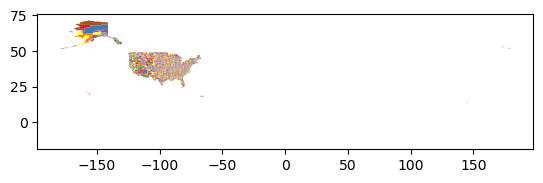

In [76]:
# d. 
# Plot geodataframe 
counties.plot(cmap="Set1")

<!-- BEGIN QUESTION -->

f. Use the next markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

We konw the this includes shape files for each of hte counties in the United states. When plotted, we see all 50 states with their respective counties. Additionally, we know the bounds of this is most the Northern Hemisphere, as it goes from -180 to 180 longitude, and 0 to 75 latitude. 

<!-- END QUESTION -->

### 6.B. Cleaning

Simplify column names as needed.

In [77]:
# Simplify columns names
counties.columns = counties.columns.str.lower().str.replace(" ", "_")

### 6.C. Data selection

Select all the counties for the state of New York in a new variable `ny_counties` and plot them.

<Axes: >

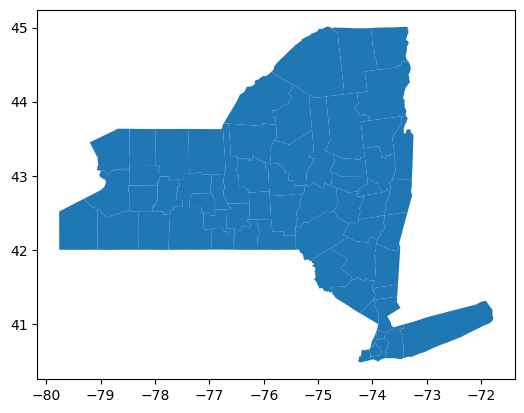

In [78]:
# Select state of new york
# New York state FP is 36
ny_counties = counties[counties["statefp"] == "36"]
ny_counties.plot()

## 7 Merging

The goal of this section is to create a single dataframe with the number of spills per county and the corresponding geometries for each county.

### 7.A. Explore data

In the next cells:

a. Print the names of counties in `ny_counties`, without repetition.

b. Print the names of counties in `spills_per_county`, without repetition. Examine the differences in the outputs.


In [79]:
# a.
# Print names of counties without repetition in ny_counties
print(ny_counties.name.unique())

['Steuben' 'Saratoga' 'Allegany' 'Oswego' 'Ulster' 'St. Lawrence'
 'Schuyler' 'Essex' 'Suffolk' 'Hamilton' 'Dutchess' 'Otsego' 'Tompkins'
 'Albany' 'Cayuga' 'Greene' 'Herkimer' 'Warren' 'Jefferson' 'Clinton'
 'Nassau' 'Madison' 'Washington' 'Westchester' 'Lewis' 'Ontario'
 'Cortland' 'Richmond' 'Erie' 'Putnam' 'Montgomery' 'Sullivan' 'Orleans'
 'Oneida' 'Cattaraugus' 'Yates' 'Tioga' 'Monroe' 'Schoharie' 'Broome'
 'Rensselaer' 'Seneca' 'Queens' 'Genesee' 'Wayne' 'Niagara' 'Kings'
 'Chemung' 'Wyoming' 'New York' 'Columbia' 'Chautauqua' 'Franklin'
 'Onondaga' 'Chenango' 'Fulton' 'Rockland' 'Livingston' 'Delaware'
 'Orange' 'Schenectady' 'Bronx']


In [80]:
# b.
# Print names of counties without repetition in spills_per_county
print(spills_per_county.county.unique())

['Albany' 'Allegany' 'Bronx' 'Broome' 'Cattaraugus' 'Cayuga' 'Chautauqua'
 'Chemung' 'Chenango' 'Clinton' 'Columbia' 'Cortland' 'Delaware'
 'Dutchess' 'Erie' 'Essex' 'Franklin' 'Fulton' 'Genesee' 'Greene'
 'Hamilton' 'Herkimer' 'Jefferson' 'Kings' 'Lewis' 'Livingston' 'Madison'
 'Monroe' 'Montgomery' 'Nassau' 'New Jersey - Region 2' 'New York'
 'Niagara' 'Oneida' 'Onondaga' 'Ontario' 'Orange' 'Orleans' 'Oswego'
 'Otsego' 'Putnam' 'Queens' 'Rensselaer' 'Richmond' 'Rockland' 'Saratoga'
 'Schenectady' 'Schoharie' 'Schuyler' 'Seneca' 'St Lawrence' 'Steuben'
 'Suffolk' 'Sullivan' 'Tioga' 'Tompkins' 'Tuscarora Indian Reservation'
 'Ulster' 'Warren' 'Washington' 'Wayne' 'Westchester' 'Wyoming' 'Yates']




c. Which are the county names that are in `spills_per_county`, but not in `ny_counties`? Your answer should be a list of strings
HINT: You can use the `numpy` function [`setdiff1d()`](https://numpy.org/doc/stable/reference/generated/numpy.setdiff1d.html), pay attention to the example in the documentation. Store your answer in the `diff_names` variable. 



In [81]:
# Counties in spills_per_county but not in ny_counties
diff_names_spills = np.setdiff1d(spills_per_county.county.unique(),
                                 ny_counties.name.unique()).tolist()
diff_names_spills

['New Jersey - Region 2', 'St Lawrence', 'Tuscarora Indian Reservation']


d. Which are the county names that are in `ny_counties`, but not in `spills_per_county`? Your answer should be a list of strings.


In [82]:
# Counties in ny_counties but not in spills_per_county
diff_names_ny = np.setdiff1d(ny_counties.name.unique(),
                                spills_per_county.county.unique()).tolist()
diff_names_ny

['St. Lawrence']




e. What is the number of spills in 'Tuscarora Indian Reservation'?


In [83]:
# e. 
# Number of spills in 'Tuscarora Indian Reservation'?
spills_per_county[spills_per_county["county"] == "Tuscarora Indian Reservation"]

,county,n_spills
56,Tuscarora Indian Reservation,1


### 7.B. Data updates

In the next cell, update 'St Lawrence' to 'St. Lawrence' in `spills_per_county` data frame and use an `assert` statement to verify that the update was successful.

You may add cells if needed.

In [84]:
# Update St Lawrence
spills_per_county['county'] = spills_per_county['county'].replace({"St Lawrence": "St. Lawrence"})
spills_per_county

,county,n_spills
0,Albany,205
1,Allegany,30
2,Bronx,143
3,Broome,75
4,Cattaraugus,47
...,...,...
59,Washington,96
60,Wayne,38
61,Westchester,743
62,Wyoming,24


In [85]:
# Assert St. Lawrence is updated
assert 'St. Lawrence' in spills_per_county['county'].values

### 7.C. Merge

In the following cells:

a. Use this cell to make any other updates needed for making an inner join of the `spills_per_county` and `ny_counties`. 

b. Over-write `ny_counties` as the  inner join of the `spills_per_county` and `ny_counties` dataframes.


In [86]:
# a. Your code here
# Prepare dataframes to join
ny_counties = ny_counties.rename(columns={"name":"county"})

In [87]:
# b. Your code here
# Join spills_per_county and ny_counties
ny_counties = ny_counties.merge(spills_per_county, on = "county", how="inner")


From our previous exploration we know that Tuscarora Indian Reservation will not be in the join. Tuscarora Indian Reservation is located within Niagara county. 

c. Since the Tuscarora Indian Reservation does not appear in the `ny_counties` dataframe, add one spill to Niagara county. Add the cells you need to make this update **and** verify that the dataframe was updated.

In [88]:
# c. Your code here

# Find index
niagara_index = ny_counties[ny_counties["county"] == "Niagara"].index[0]

# Save current spill number
niagara_spill_before = ny_counties.at[niagara_index, "n_spills"]

# Add one spill
ny_counties.at[niagara_index, "n_spills"] += 1

# Save updated spill number
niagara_spill_after = ny_counties.at[niagara_index, "n_spills"]

# Verify updated dataframe
assert(niagara_spill_after == niagara_spill_before + 1)

<!-- BEGIN QUESTION -->

## 8. Map
a. Create a choropleth map of the number of petroleum spills per county in the state of New York in 2023. 
Your map should be polished and have (at least) the following updates:
- a legend indicating the number of spills
- an updated color map
- a title 
- no axis
- an [annotation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html) with the data source (New York State Department of Environmental Conservation) and date of access.



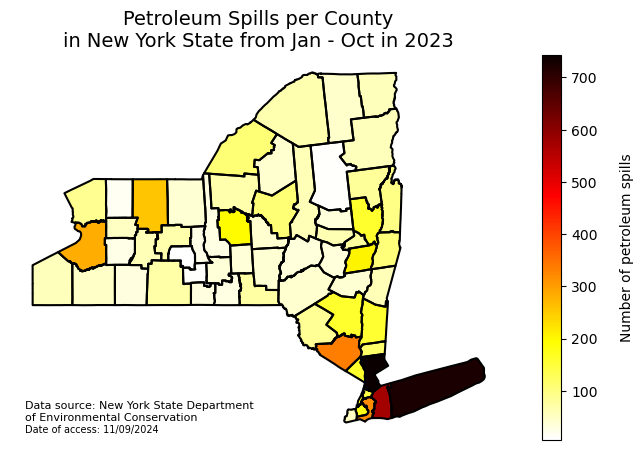

In [95]:
# a. 
# Plot data
fig, ax = plt.subplots(figsize=(9,5))
# Remove axis for a cleaner map and set title
ax.axis('off')
ax.set_title('Petroleum Spills per County\nin New York State from Jan - Oct in 2023', fontsize=14)
# Plot NY state and color by number of spills
ny_counties.plot(ax=ax,
                column='n_spills',
                cmap='hot_r',
                legend=True,
                legend_kwds={
                    'label':'\nNumber of petroleum spills'
                })
ny_counties.boundary.plot(ax=ax,
                          color="black")
# Annotate source and date of access
plt.annotate("Data source: New York State Department\nof Environmental Conservation", xy=(-79.9,40.5), fontsize=8)
plt.annotate("Date of access: 11/09/2024", xy=(-79.9,40.35), fontsize=7)
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Write a figure description for the map, including tha names of the top 3 counties with the most petroleum spills. If you need to do additional data analysis to include relevant information from the data, you may include additional code cells here.

In [90]:
# Verify the top 3 counties
(ny_counties[["county", "n_spills"]]
 .sort_values(by='n_spills', ascending=False)
 .head(3)
)

,county,n_spills
23,Westchester,743
8,Suffolk,723
20,Nassau,576


The figure helps visualize the number of petroleum spills per each county in New York State. The lowest spill counties are in white, while the highest counties are in black. From the above code output, we can see the the most spills occured in Westchester, Suffolk, and Nassau county, respectivley. 